In [2]:
#import imageio
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import math
from os import listdir
import pickle
from sklearn import preprocessing

In [3]:
goodpath= '../data/cropped/good/'
badpath= '../data/cropped/bad/'

Einlesen der Dateien

In [123]:
np.max((np.array([1, 2, 3]), np.array([3, 2, 1])), axis=1)

array([3, 3])

In [130]:
def calc_features(file):
    i  = Image.open(file).convert('LA')
    snippet = np.array(i)[:,:,0]
    
    # Normalize values
    snippet = snippet - snippet.min()
    snippet = snippet / snippet.max()
    
    mean = snippet.mean()
    middle_col = math.floor(snippet.shape[1]/2)
    bucketsize = math.floor(snippet.shape[1]/3)
    
    middle_max = snippet[:,middle_col].max()
    middle_row_max = (snippet[:,middle_col] - np.max((snippet[:,bucketsize], snippet[:,-bucketsize]), axis=0)).max()
    middle_raised = (snippet[:,middle_col-10:middle_col+10] > mean * 1.25).mean()

    bucketsize= math.floor(snippet.shape[1]/3)
    snippet1= snippet[:,math.floor(bucketsize/2):bucketsize]
    snippet2= snippet[:,bucketsize+1:bucketsize*2]
    snippet3= snippet[:,bucketsize*2+1:-math.floor(bucketsize/2)]
    aa = (mean, middle_max, middle_row_max, middle_raised,
          abs(snippet2.mean()-snippet1.mean()), abs(snippet2.mean()-snippet3.mean()), 
          abs(snippet1.mean()-snippet3.mean()))
    return (aa)

calc_features(goodpath + 'waterfall_11331_2017-07-30T08-45-10.png')

(0.4219364013933548,
 0.9777777777777777,
 0.5288888888888889,
 0.3908125,
 0.0014955524956436483,
 0.005138474504190471,
 0.003642922008546823)

In [131]:
#im = imageio.imread('../satnogs-network-loader/out/good/5c585650-d477-11e8-b6c4-41943105ba26.png')
#im.shape

def run_pictures(path, label):
    im_files= listdir(path)
    features = []
    labels = []
    filenames = []
    for file in(im_files):
        features.append(calc_features(path + file))
        labels.append(label)
        filenames.append(file)
    return (np.array(features), np.array(labels), np.array(filenames))

In [132]:
good_features, good_labels, filenamesg = run_pictures(goodpath, 1)
print(good_features.shape)
print(good_labels.shape)

(337, 7)
(337,)


In [133]:
bad_features, bad_labels, filenamesb = run_pictures(badpath, 0)
print(bad_features.shape)
print(bad_labels.shape)

(261, 7)
(261,)


In [134]:
features = np.concatenate((good_features, bad_features))
labels = np.concatenate((good_labels, bad_labels))
files =  np.concatenate((filenamesg, filenamesb))
print(features.shape)
print(labels.shape)
print(files.shape)

(598, 7)
(598,)
(598,)


In [135]:
with open('../cache/features', 'wb') as f:
    pickle.dump((features, labels, files), f)

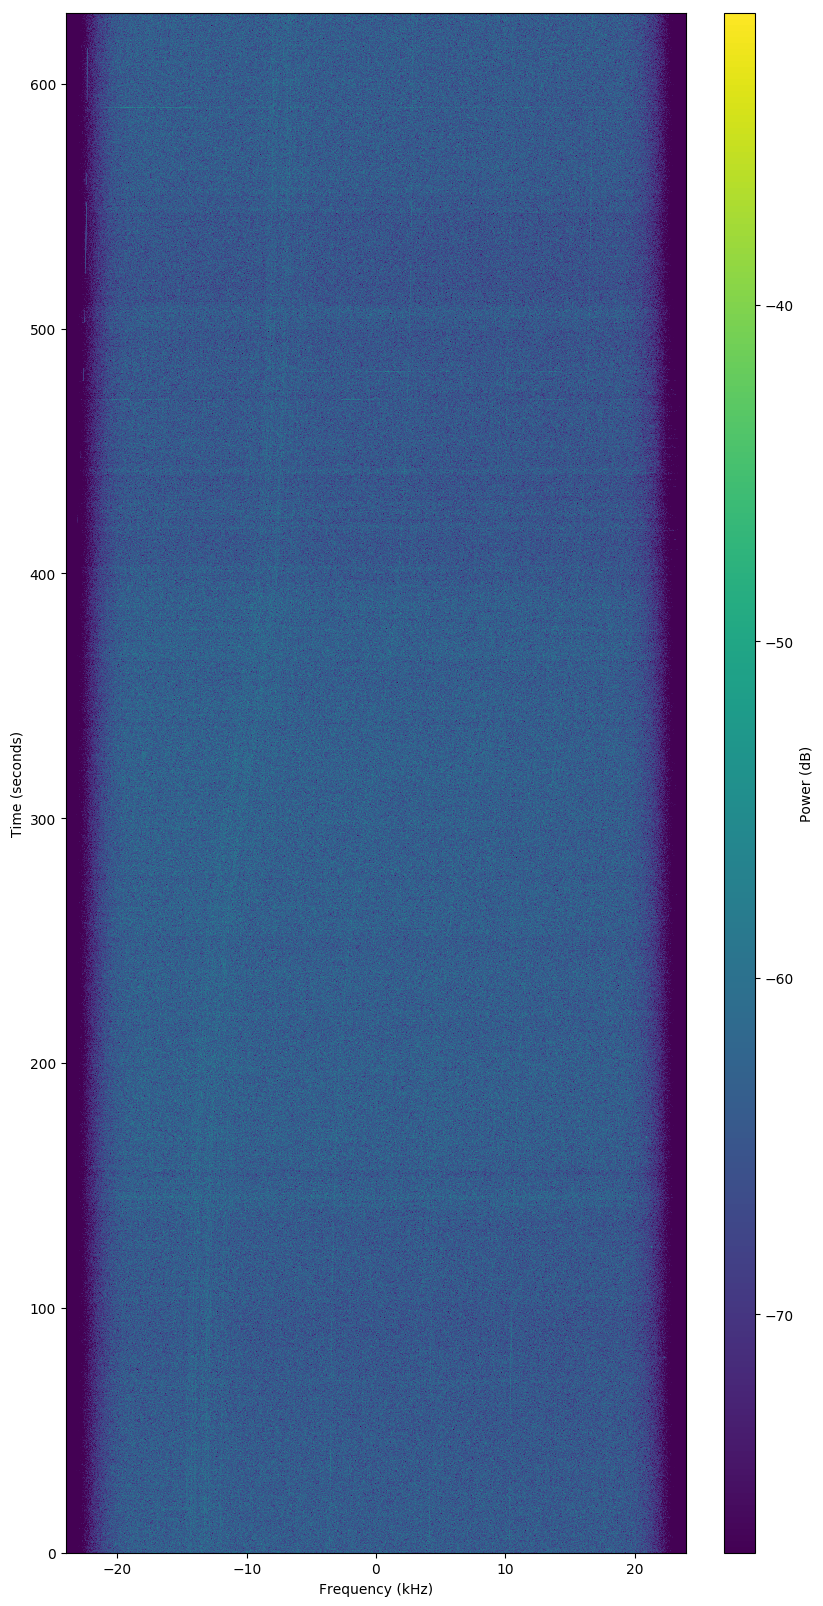

In [93]:
Image.fromarray(im)

In [190]:
im = Image.open('../satnogs-network-loader/out/good/6fa8a8e0-d495-11e8-ab81-c3b907e5b35a.png')
im.show()

#Image.fromarray(im)

In [49]:
snippet = im[10:1550,70:700,:]

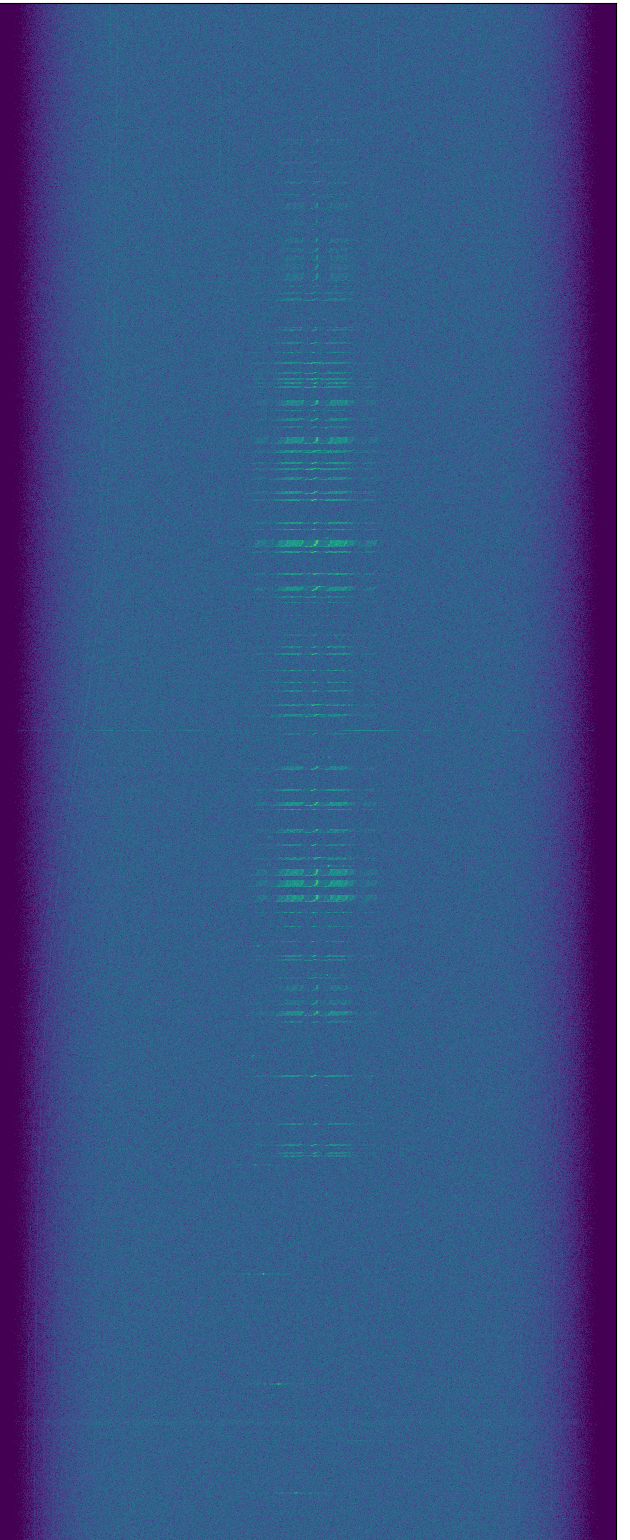

In [50]:

Image.fromarray(snippet)

Doing some analysis

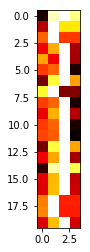

In [13]:
plt.imshow(abs(good_features[:20]), cmap='hot')
plt.show()


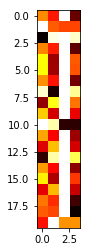

In [14]:
plt.imshow(abs(bad_features[:20]), cmap='hot')
plt.show()

In [189]:
for index, item in enumerate(good_features):
        print(index, item, filenamesg[index])

0 [1.         0.32074543 0.67925457 0.67925457] 6fa0e0b0-d495-11e8-ab81-c3b907e5b35a.png
1 [1.         0.03590227 0.96409773 0.96409773] 6fa12ed0-d495-11e8-ab81-c3b907e5b35a.png
2 [0.77227157 1.         0.22772843 0.22772843] 6fa17cf0-d495-11e8-ab81-c3b907e5b35a.png
3 [1.         0.91065576 0.08934424 0.08934424] 6fa28e60-d495-11e8-ab81-c3b907e5b35a.png
4 [0.5144182 1.        0.4855818 0.4855818] 6fa2b570-d495-11e8-ab81-c3b907e5b35a.png
5 [1.         0.09769635 0.90230365 0.90230365] 6fa39fd0-d495-11e8-ab81-c3b907e5b35a.png
6 [0.65401719 0.34598281 1.         0.30803438] 6fa3edf0-d495-11e8-ab81-c3b907e5b35a.png
7 [0.26493924 1.         0.73506076 0.73506076] 6fa43c10-d495-11e8-ab81-c3b907e5b35a.png
8 [0.1266016 1.        0.8733984 0.8733984] 6fa46320-d495-11e8-ab81-c3b907e5b35a.png
9 [1.         0.92550177 0.07449823 0.07449823] 6fa48a30-d495-11e8-ab81-c3b907e5b35a.png
10 [0.66121264 0.33878736 1.         0.32242528] 6fa4b140-d495-11e8-ab81-c3b907e5b35a.png
11 [0.89008209 1.         0.

In [154]:
88.24/ 87.64


1.006846188954815